| <p style="text-align: left;">Name</p>               | Matr.Nr. | <p style="text-align: right;">Date</p> |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Fathy Shalaby</p> | 11701175 | 27.05.2020                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 8 (Assignment) -- Introduction to Reinforcement Learning -- Part I </h2>

<b>Authors</b>: Brandstetter, Schäfl <br>
<b>Date</b>: 18-5-2020

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies 
to all code within this file.

<b>Copyright statement</b>: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Exercise 0</h2>
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the same modules:

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
%cd /gdrive/My Drive/as8

/gdrive/My Drive/as8


In [0]:
import u8_utils as u8
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from typing import Any, Dict, Tuple

# Set Seaborn plotting style.
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h3 style="color:rgb(0,120,170)">Module versions</h3>
As mentioned in the introductiory slides, specific minimum versions of Python itself as well as of used modules is recommended.

In [0]:
u8.check_module_versions()

Installed Python version: 3.6 (✗)
Installed matplotlib version: 3.2.1 (✓)
Installed Pandas version: 1.0.3 (✓)
Installed Seaborn version: 0.10.1 (✓)
Installed OpenAI Gym version: 0.17.2 (✓)


<h2>Exercise 1</h2>

All exercises in this assignment are referring to the <i>FrozenLake-v0</i> environment of <a href="https://gym.openai.com"><i>OpenAI Gym</i></a>. This environment is descibed according to its official <a href="https://gym.openai.com/envs/FrozenLake-v0/">OpenAI Gym website</a> as follows:<br>
<cite>Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.</cite>


There are <i>four</i> types of surfaces described in this environment:
<ul>
    <li><code>S</code> $\rightarrow$ starting point (<span style="color:rgb(0,255,0)"><i>safe</i></span>)</li>
    <li><code>F</code> $\rightarrow$ frozen surface (<span style="color:rgb(0,255,0)"><i>safe</i></span>)</li>
    <li><code>H</code> $\rightarrow$ hole (<span style="color:rgb(255,0,0)"><i>fall to your doom</i></span>)</li>
    <li><code>G</code> $\rightarrow$ goal (<span style="color:rgb(255,0,255)"><i>frisbee location</i></span>)</li>
</ul>


If not already done, more information on how to <i>install</i> and <i>import</i> the <code>gym</code> module is available in the lecture's notebook.

In [0]:
import gym

from gym.envs.toy_text import FrozenLakeEnv

<h3 style="color:rgb(0,120,170)">States and actions</h3>
Experiment with the <i>FrozenLake-v0</i> environment as discussed during the lecture and explained in the accompanying notebook.
<ul>
    <li>Create a <i>FrozenLake</i> environment with either a call to the constructor <code>FrozenLakeEnv()</code> or via a general factory function <code>gym.make(r'FrozenLake-v0').env</code>.
    <li>For reproducability reasons, always set the <i>random seed</i> if working with randomness (like drawing from a distribution using a pseudo random number generator). The <code>u8_utils.py</code> file provides a neat helper function <code>set_seed</code> for this very purpose.</li>
</ul>

In [0]:
frozen_environment = FrozenLakeEnv()
u8.set_seed(environment=frozen_environment, seed=42)

As a next step, and as the environment might be unknown to some, visualise the current state.
<ul>
    <li>Visualise the current <i>FrozenLake</i> environment in a human-readable way.</li>
    <li>Print the identifier of the current state using the appropriate property of the environment.</li>
</ul>

In [0]:
frozen_environment.render(mode=r'human')
current_state_id = frozen_environment.s
print(f'Current state ID: {current_state_id}')


SFFF
FHFH
FFFH
HFFG
Current state ID: 0


The current position of the <i>disc retrieving</i> entity is displayed as a filled <span style="color:rgb(255,0,0)"><i>red</i></span> rectangle.

As we want to tackle this problem using our renowned <i>random search</i> approach, we have to analyse its applicability beforehand. Hence, the number of possible <i>actions</i> and <i>states</i> is of utter importance, as we don't want to get lost in the depth of combinatorial explosion.
<ul>
    <li>Query the amount of <i>actions</i> using the appropriate peoperty of the lake environment.</li>
    <li>Query the amount of <i>states</i> using the appropriate property of the lake environment.</li>
</ul>

In [0]:
num_actions = frozen_environment.action_space.n
num_states = frozen_environment.observation_space.n
print(f'The frozen_environment comprises <{num_actions}> actions and <{num_states}> states.')

The frozen_environment comprises <4> actions and <16> states.


<h3 style="color:rgb(0,120,170)">Rewards</h3>
Remember that each <i>action</i> triggers a <i>reaction</i> (at least in the domain of Reinforcement Learning), in this case in the form of a <i>reward</i> or a <i>penalty</i>. As the definition of both, the former as well as the latter would be redundant, only the former is kept, the <i>reward</i>. The latter, the <i>penalty</i>, is simply a <i>negative reward</i>. According to the description of the <a href=https://gym.openai.com/envs/FrozenLake-v0/>environment's website</a>:<br><br>
<cite>The episode ends when you reach the goal or fall in a hole. You receive a reward of $1$ if you reach the goal, and zero otherwise.</cite><br><br>
Hence in the current setting, only <i>non-negative</i> rewards are issued, and <i>no</i> penalty per se. The goal of our <i>agent</i> is to maximise the reward by still solving the task. in this setting, this would translate to the following premises:
<ul>
    <li>Reach the goal (i.e. pickup the frisbee).</li>
    <li>Do not undertake involuntary dives.</li>
    <li>Try to keep some distance to holes, as the ice is slippery.</li>
</ul>

The mapping <i>state</i>$\rightarrow$<i>action</i> for all possible combinations of <i>state</i> and <i>actions</i> is defined in a <i>reward table</i>. Investigate the reward tablewith respect to the <i>current state</i> of our instantiated <i>FrozenLake</i> environment.

In [0]:
frozen_environment.P[current_state_id]

{0: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 4, 0.0, False)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 2: [(0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)],
 3: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

Each entry of the <i>reward table</i> contains a dictionary of the form <code>A: [3 x (B, C, D, E)]</code>.

<h3 style="color:rgb(208,90,80)">Tasks</h3>

<ul>
    <li><span style="color:rgb(208,90,80)">Think about the different <i>actions</i>. Which ones might be available?</span></li>
    <li><span style="color:rgb(208,90,80)">Think about the different <i>states</i>. Which ones might be possible?</span></li>
    <li><span style="color:rgb(208,90,80)">Think about the structure of the <i>reward table</i>. Why are there <i>three</i> elements per dictionary entry, instead of <i>one</i> like the <i>Taxi</i> environment defined?</span></li>
</ul>

In [0]:
print('Different actions = ',str(frozen_environment.action_space))

Different actions =  Discrete(4)


In [0]:
print('Different actions = ',str(frozen_environment.observation_space))

Different actions =  Discrete(16)


<h2>Exercise 2</h2>

Previously, we talked about solving this task in a na&#xEF;ve way by simply applying <i>brute force</i>: using <i>random search</i>. In the meantime we analysed the <i>action</i> as well as the <i>state space</i> and came to the conclusion, that such an approach is more than feasible. To repeat the outline of such an approach:
<ul>
    <li><code>I</code> $\rightarrow$ choose a random <i>action</i> with respect to the <i>current</i> state.</li>
    <li><code>II</code> $\rightarrow$ execute previously chosen <i>action</i> and transition into a <i>new</i> state.</li>
    <li><code>III</code> $\rightarrow$ if the episode is finished, but the goal not reached, <i>reset</i> the position of the <i>disc retrieving entity</i>.</li>
</ul>

This procedure is repeated as long as the task is not solved or a defined maximum of steps is reached, whatever triggers first (<code>IV</code>). Adapt the function <code>apply_random_search</code> as discussed during the lecture. Mark the corresponding sections of the code using <code>I</code>, <code>II</code>, <code>III</code> and <code>IV</code>. Note that our <i>random search</i> is <i>not</i> guaranteed to find  the solution of a task in <i>finite time</i>, hence an upper border on the <i>runtime</i> is often applied as a safety net (in our case the <i>number of allowed steps</i>).

In [0]:
def apply_random_search(environment: FrozenLakeEnv,max_step=10000) -> Tuple[int, int, int, Dict[str, Any]]:
    """
    Solve specified environment by applying random search.
    
    :return: amount of steps performed, penalties inflicted, final reward and captured frames
    """
    num_steps, num_penalties, final_reward = 0, 0, 0
    captured_frames = []
    solved = False
    prev_reward = 0
    # <IV>: This procedure is repeated as long as the task is not solved or a defined maximum of steps is reached, whatever triggers first.
    while num_steps < max_step or prev_reward!=1:
    # <III>: If the episode is finished, but the goal not reached, reset the position of the disc retrieving entity.
        current_state = environment.reset()
        done = False
        while not done:
          # <I>: choose a random action with respect to the current state.
          current_action = environment.action_space.sample()
          # <II>: execute previously chosen action and transition into a new state.
          current_state, current_reward, done, info = environment.step(current_action)
          # Update counter for inflicted penalties.
          prev_reward= current_reward
          final_reward += current_reward
          if current_reward == -10:
              num_penalties += 1
          num_steps += 1
          # Save rendering of current state.
          captured_frames.append({
              r'frame': environment.render(mode=r'ansi'),
              r'state': current_state,
              r'action': current_action,
              r'reward': current_reward
          })
        
    return num_steps, num_penalties, final_reward, captured_frames

Now everything is setup and the <i>random search</i> procedure is eagerly waiting to explore the exciting world of <i>FrozenLake-v0</i> (the <i>Taxi-v3</i> world was a less exciting than thought)!
<ul>
    <li>Again for reproducability reasons, the <i>random seed</i> is set, in this case to $42$. The <code>u8_utils.py</code> file provides a neat helper function <code>set_seed</code> for this very purpose.</li>
    <li>To actually start the random search, the previously defined function <code>apply_random_search</code> is of great help.</li>
    <li>At least randomly search for $10\ 000$ steps.</li>
</ul>

To get a better feeling about the <i>exploration</i>, we're reporting the amount of steps performed as well as the amount of involuntary dives. Let's get excited!

In [0]:
u8.set_seed(environment=frozen_environment, seed=42)
num_steps, num_penalties, final_reward, captured_frames = apply_random_search(environment=frozen_environment)
print(f'{num_steps} steps taken and {num_penalties} penalties inflicted during randomly searching the goal, with a final reward of {final_reward}.')

10131 steps taken and 0 penalties inflicted during randomly searching the goal, with a final reward of 21.0.


Actually, the result looks quite good, especially when comparing it with the random searches conducted in the <i>Taxi</i> environment. Let's animate the searching procedure (use a <code>delay</code> of $0.1$ for better visualisation):

In [0]:
u8.animate_environment_search(frames=captured_frames, verbose=True, delay=0.01)

  (Down)
SFFF
FHFH
FFFH
HFFG

Step No.: 10131
State ID: 15
Action ID: 1
Reward: 1.0


<h3 style="color:rgb(208,90,80)">Tasks</h3>

<ul>
    <li><span style="color:rgb(208,90,80)">Why is the result of randomly searching the <i>FrozenLake-v0</i> environment by far better than randomly searching the <i>Taxi</i> environment?</span></li>
    <li><span style="color:rgb(208,90,80)">Are the results transferable to <i>bigger</i> lakes? Argument your answer.</span></li>
</ul>

There are less options so the model is able to learn faster thus the results are far better than randomly searching the Taxi enviorment.

Yes the results should be transferable to bigger lakes, to a certain extend, we can use the pretrained model on the bigger lake, however would still need to train it further if there are more steps available

<h2>Exercise 2</h2>

To drill down on the drawbacks of plain <i>random search</i>, we are designing the following experimental setup:
<ul>
    <li>Repeat the previous <i>random search</i> procedure $100$ times.</li>
    <li>Aggregate the results of each run for later analysis.</li>
    <li>Visualise the aggegrated results using e.g. <i>box-</i> and <i>swarm-plots</i>.</li>
</ul>
Once again, we are setting the <i>random seed</i>, but take care of setting it <i>outside</i> the loop, otherwise the same result is reported with each iteration (and an aggregation of the results would not give us any more insights).

In [0]:
u8.set_seed(environment=frozen_environment, seed=42)
num_steps_total, num_penalties_total, final_reward_total = [], [], []
num_repetitions = 100

# Collect information over multiple repetitions.
for repetition in range(num_repetitions):
    num_steps, num_penalties, final_reward, _ = apply_random_search(environment=frozen_environment)
    num_steps_total.append(num_steps)
    num_penalties_total.append(num_penalties)
    final_reward_total.append(final_reward)

# Combine collected information to a data frame for further downstream analysis.
collected_experiment_info = pd.DataFrame(zip(
    num_steps_total, num_penalties_total, final_reward_total
), columns=(r'Steps performed', r'Penalties inflicted', r'Final reward'))

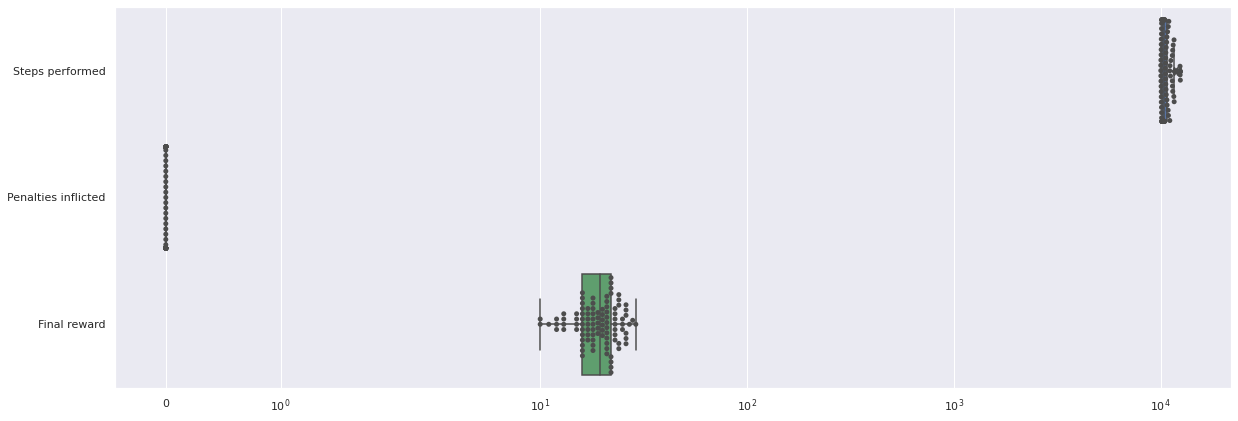

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(20, 7))
ax[0, 0].set_xscale(r'symlog')
_ = sns.boxplot(data=collected_experiment_info, ax=ax[0, 0], orient=r'h')
_ = sns.swarmplot(data=collected_experiment_info, ax=ax[0, 0], color=r'0.3', orient=r'h')

<h3 style="color:rgb(208,90,80)">Tasks</h3>

<ul>
    <li><span style="color:rgb(208,90,80)">Try out different <code>maximal steps</code> and <code>initial seeds</code> (still repeating the random search procedure $100$ times). Do the results differ?</span></li>
    <li><span style="color:rgb(208,90,80)">Which kind of information could a potential <i>Reinforcement Learning</i> method incorporate?</span></li>
</ul>

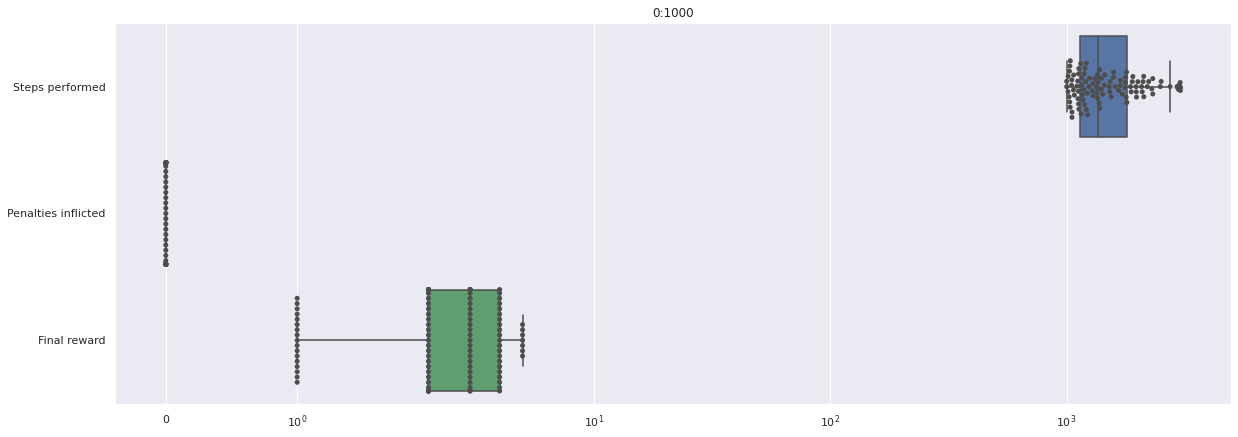

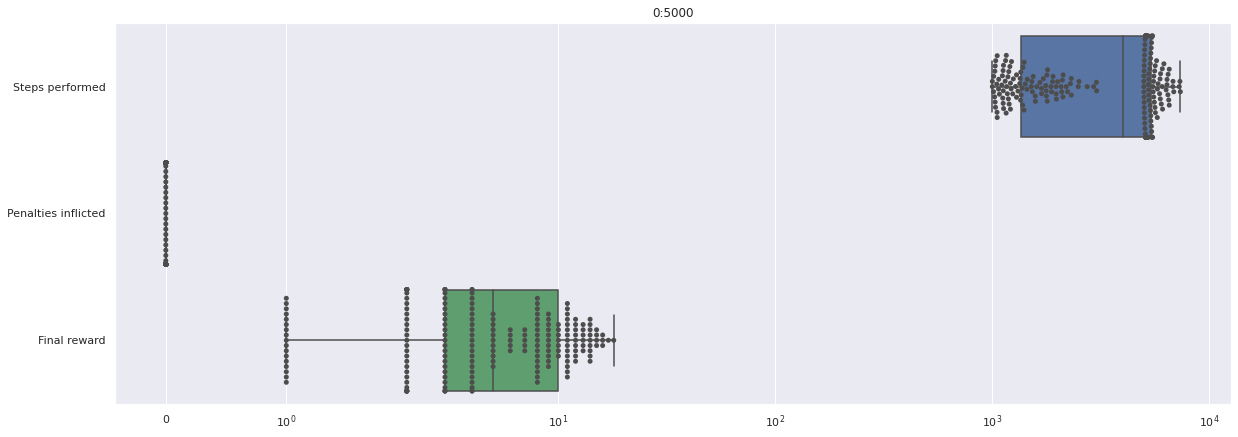

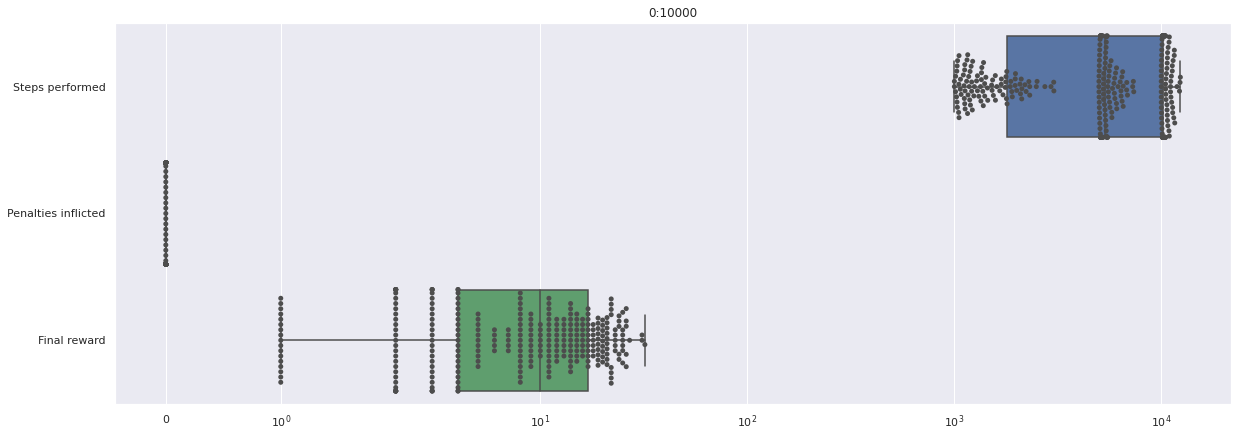

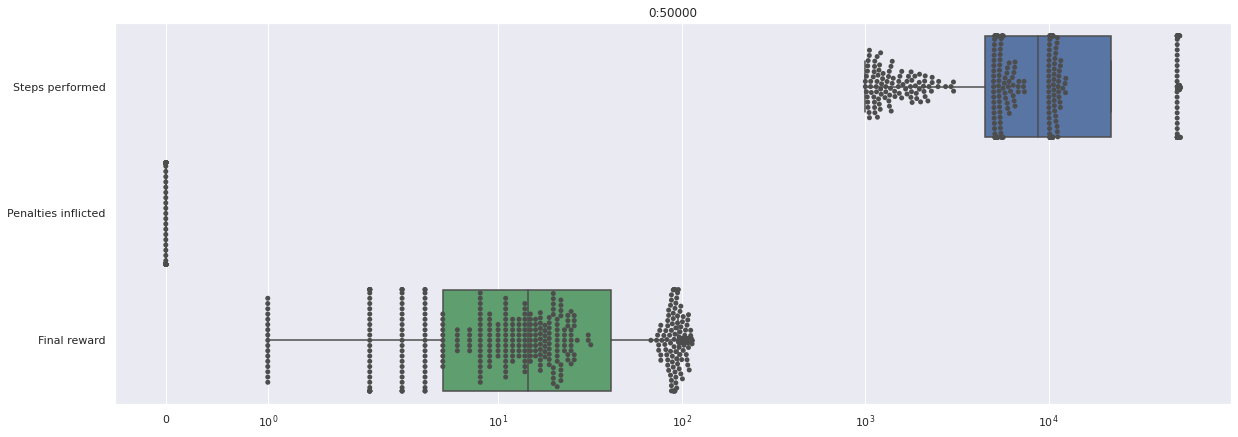

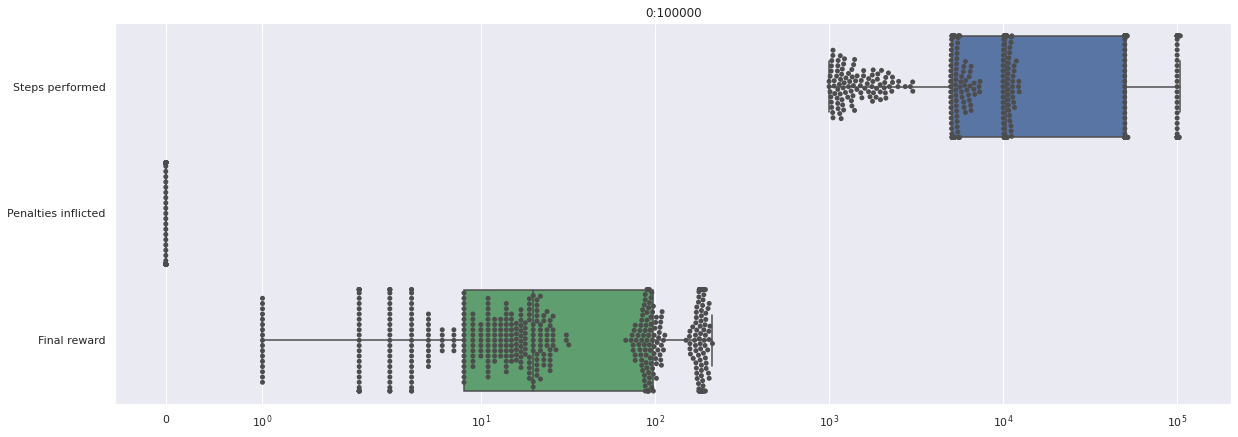

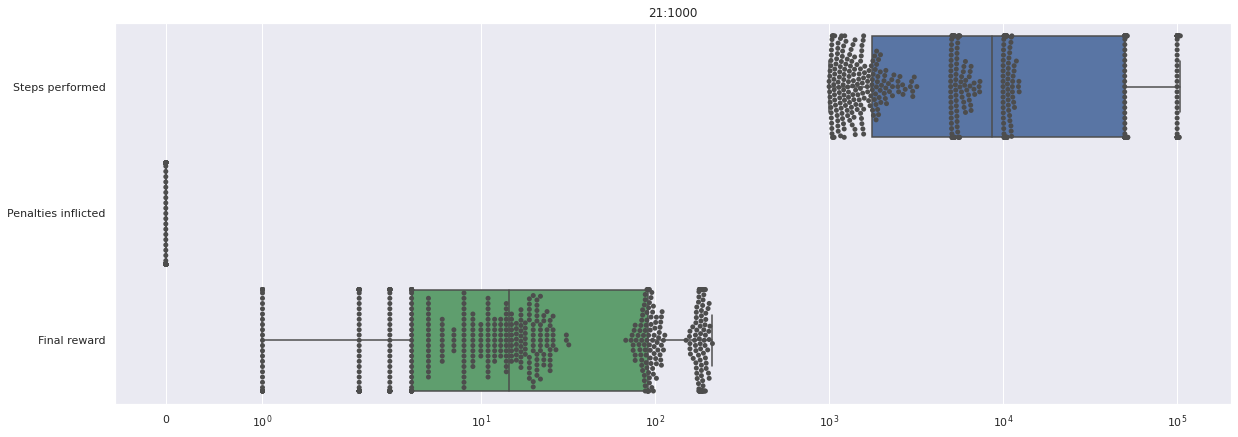

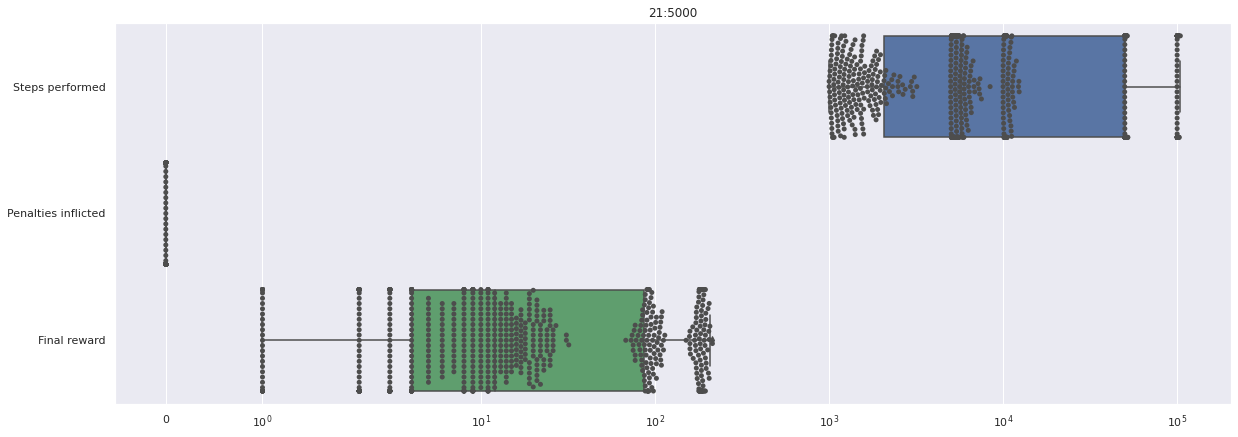

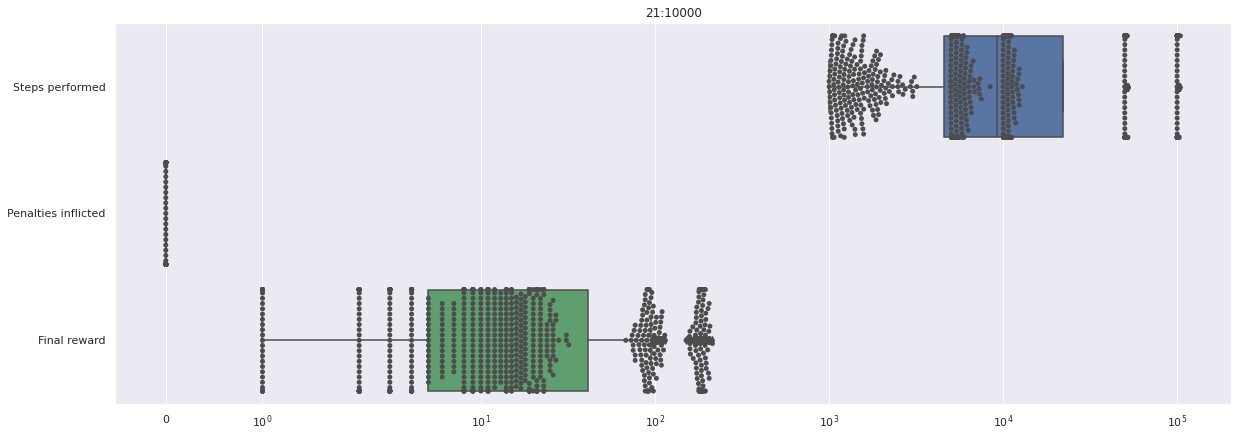

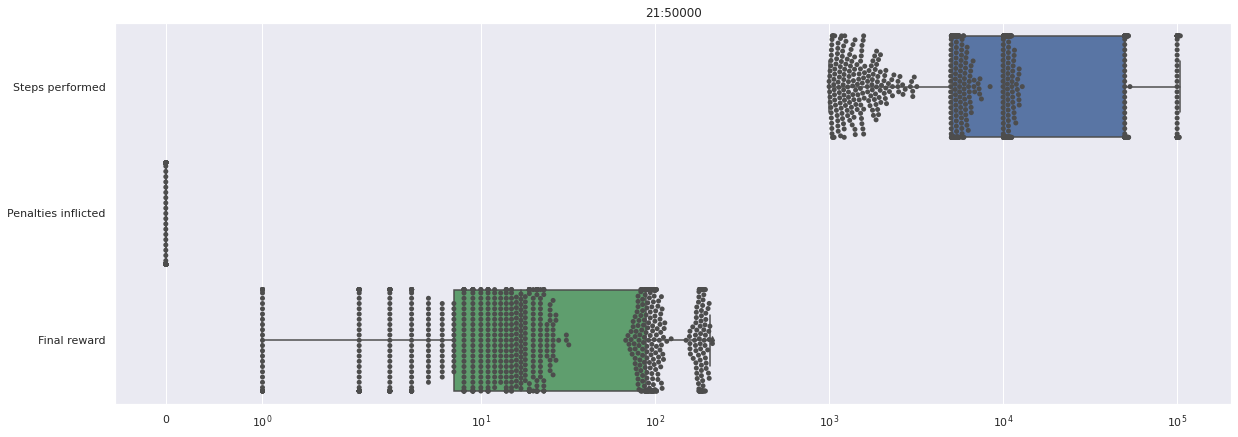

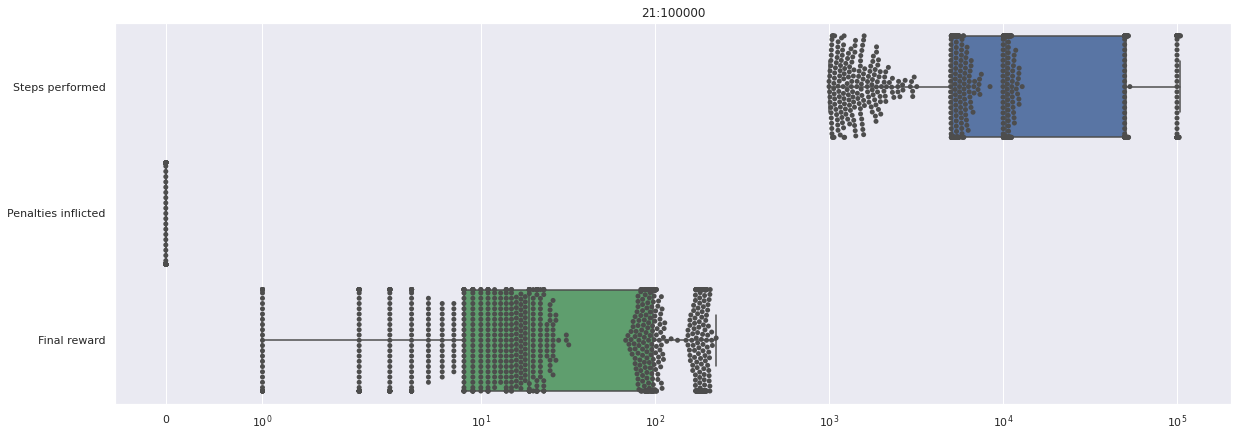

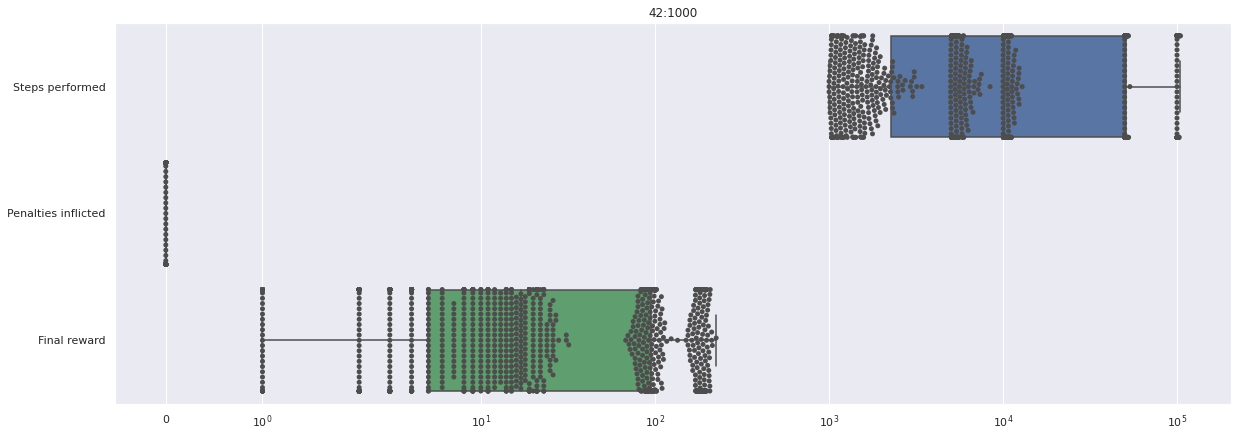

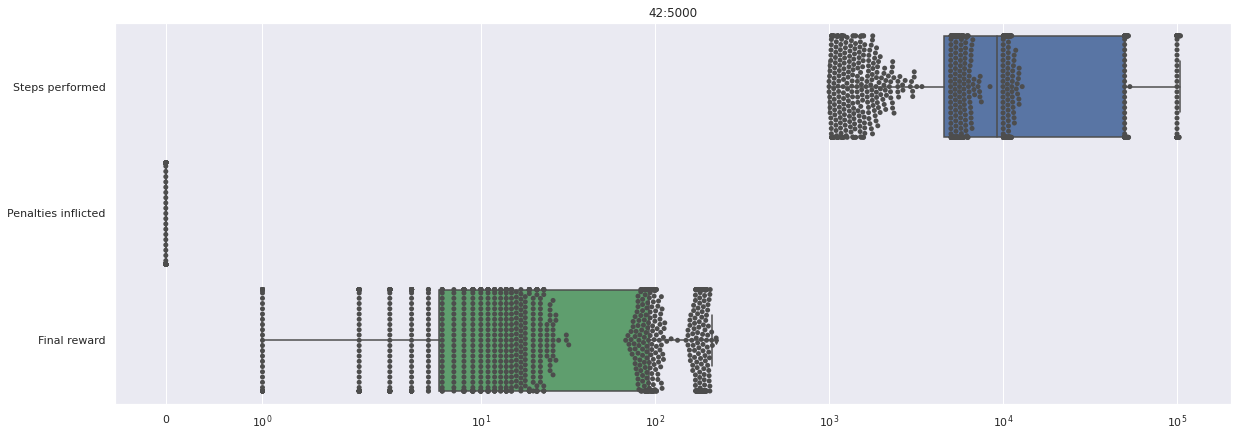

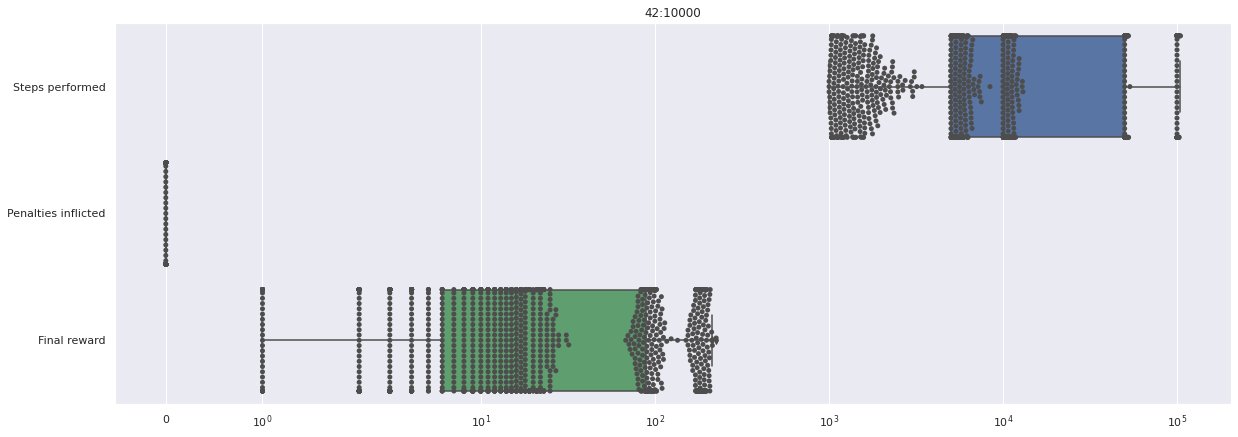

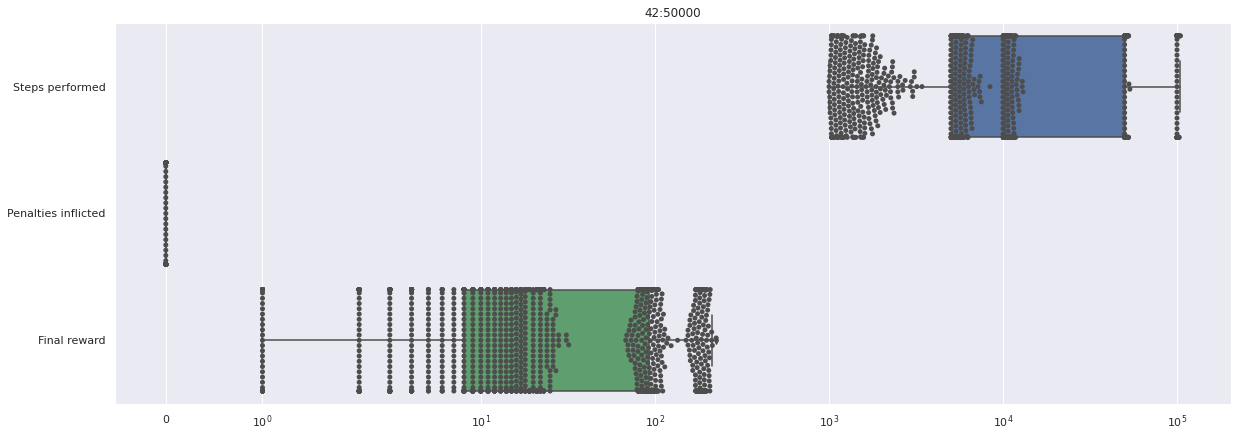

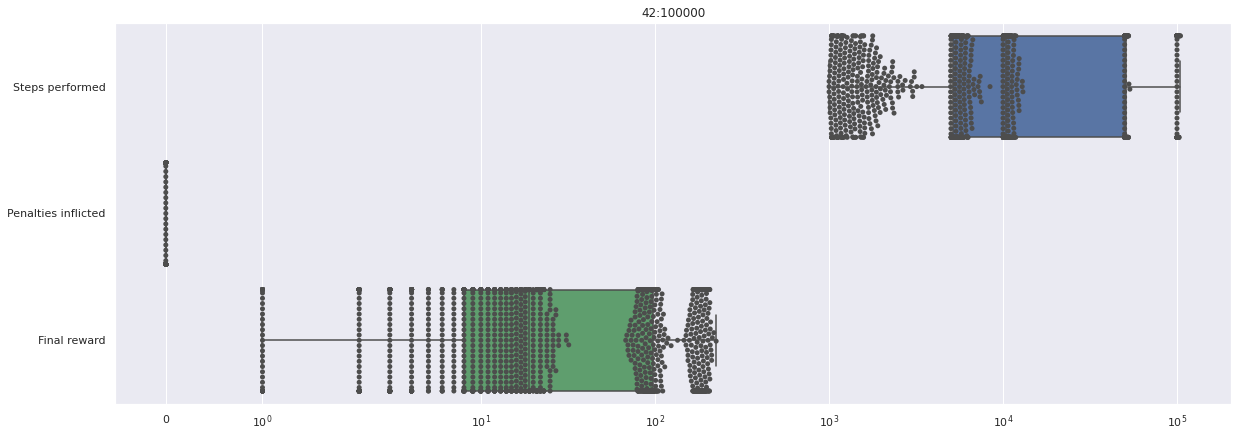

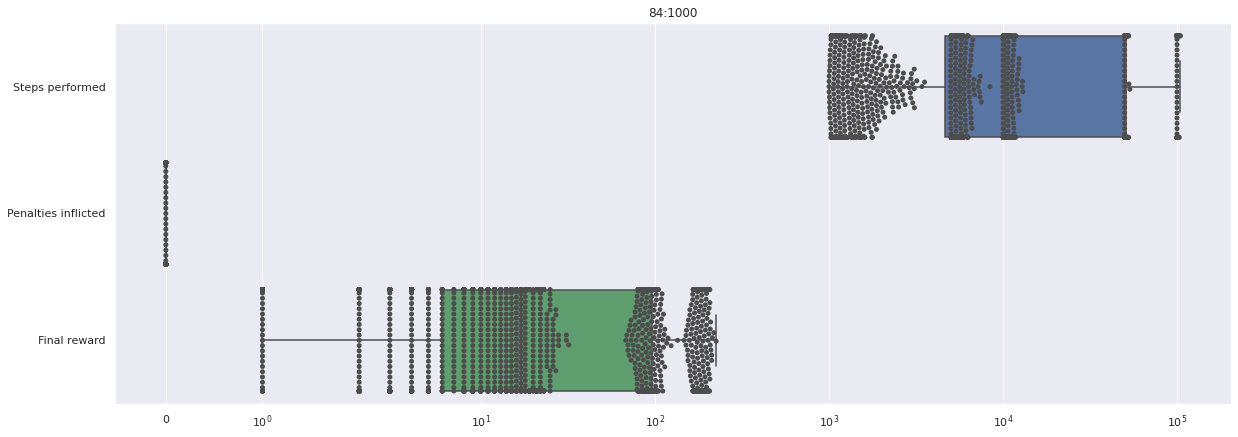

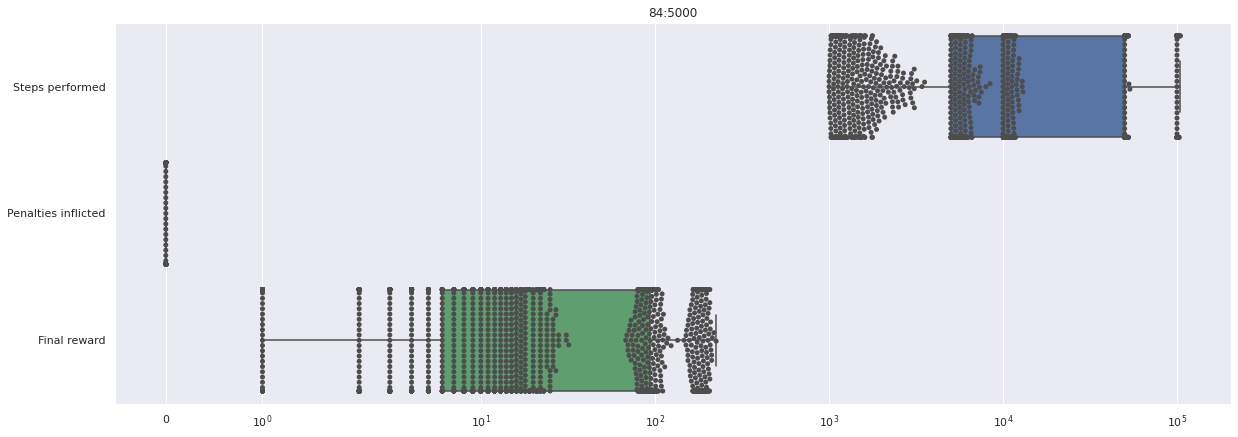

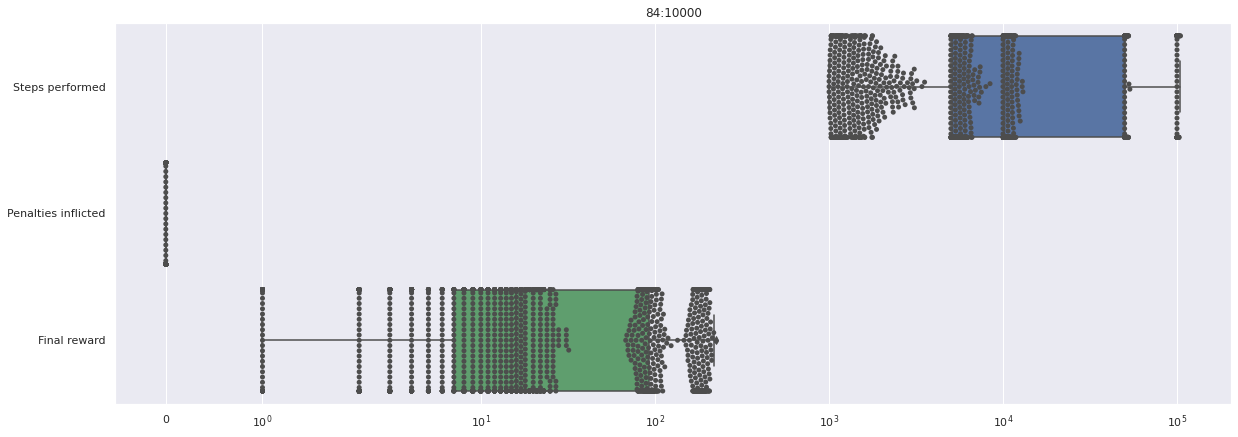

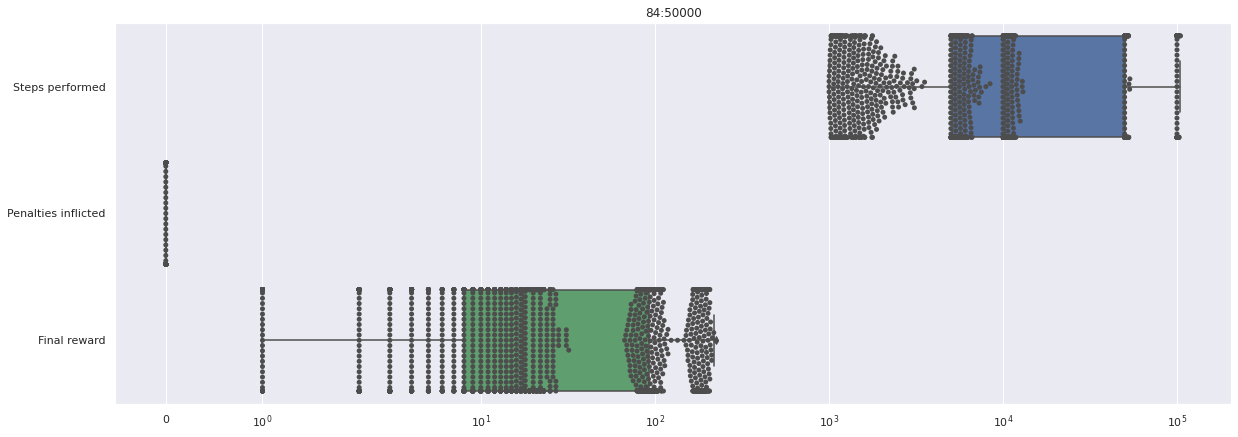

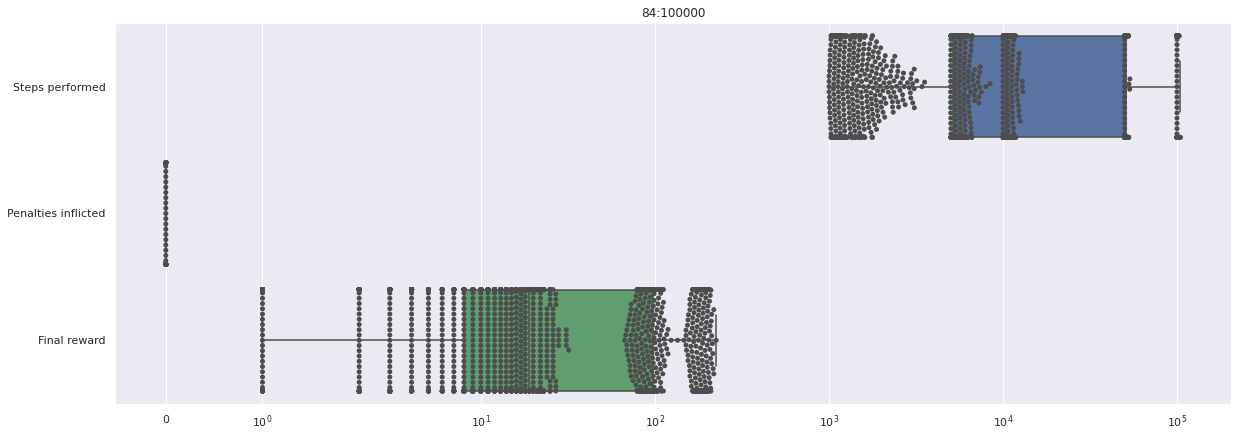

In [0]:
num_steps_total, num_penalties_total, final_reward_total = [], [], []
num_repetitions = 100
mxlist = [1000,5000,10000,50000,100000]
rdseedlist = [0,21,42,84]
for rdseed in rdseedlist:
  u8.set_seed(environment=frozen_environment, seed=rdseed)
  for mx in mxlist:
    # Collect information over multiple repetitions.
    for repetition in range(num_repetitions):
        num_steps, num_penalties, final_reward, _ = apply_random_search(environment=frozen_environment,max_step=mx)
        num_steps_total.append(num_steps)
        num_penalties_total.append(num_penalties)
        final_reward_total.append(final_reward)

    # Combine collected information to a data frame for further downstream analysis.
    collected_experiment_info = pd.DataFrame(zip(
        num_steps_total, num_penalties_total, final_reward_total
    ), columns=(r'Steps performed', r'Penalties inflicted', r'Final reward'))
    fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False, figsize=(20, 7))
    ax[0, 0].set_xscale(r'symlog')
    _ = sns.boxplot(data=collected_experiment_info, ax=ax[0, 0], orient=r'h')
    _ = sns.swarmplot(data=collected_experiment_info, ax=ax[0, 0], color=r'0.3', orient=r'h')
    plt.title(str(rdseed)+':'+str(mx))
    plt.show()